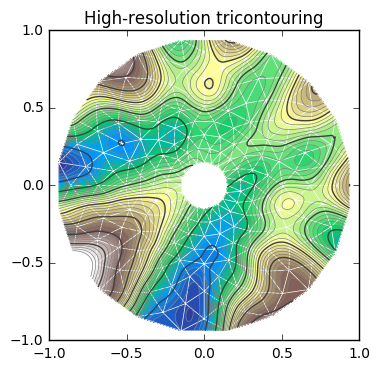

In [1]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math


#-----------------------------------------------------------------------------
# Analytical test function
#-----------------------------------------------------------------------------
def function_z(x, y):
    """ A function of 2 variables """
    r1 = np.sqrt((0.5 - x)**2 + (0.5 - y)**2)
    theta1 = np.arctan2(0.5 - x, 0.5 - y)
    r2 = np.sqrt((-x - 0.2)**2 + (-y - 0.2)**2)
    theta2 = np.arctan2(-x - 0.2, -y - 0.2)
    z = -(2*(np.exp((r1/10)**2) - 1)*30. * np.cos(7.*theta1) +
          (np.exp((r2/10)**2) - 1)*30. * np.cos(11.*theta2) +
          0.7*(x**2 + y**2))
    return (np.max(z) - z)/(np.max(z) - np.min(z))

#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = function_z(x, y)

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

#-----------------------------------------------------------------------------
# Refine data
#-----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

#-----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
#-----------------------------------------------------------------------------
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, lw=0.5, color='white')

levels = np.arange(0., 1., 0.025)
cmap = cm.get_cmap(name='terrain', lut=None)
plt.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)
plt.tricontour(tri_refi, z_test_refi, levels=levels,
               colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

plt.title("High-resolution tricontouring")

plt.show()